# Part II - Effects of Gender and User Type on Duration of a Trip 

## by Abdellah Ait Ahmed Ouaal


## Investigation Overview


In this investigation, I want to present the effect of the two predictor factors gender and user type on the duration of the trip. 


## Dataset Overview

The dataset consists of 183413 records concerning individual trips. The attributes included the two categorical variables gender(male, female, other) and user type(subscriber or customer), as well as starting and ending times

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
tripdata = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
# we drop rows with missing values 
tripdata.dropna(inplace=True)

## Distribution of Duration of The Trip

The duration of each trip in seconds take a very large range of values, with the lowest value 61s to the highest value 84548s. Plotted on a logarithmic scale, this distribution take a log-normal shape which means the vast majority of durations are between 200s and 1000s, and very little of them are either under 200s or more than 1000s.

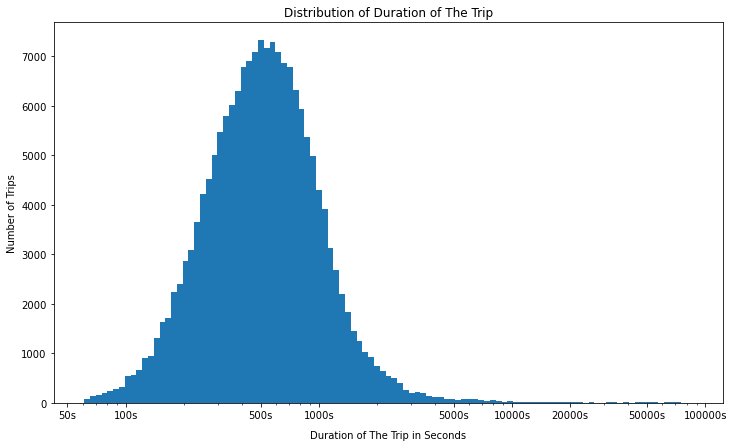

In [6]:
binsize = 0.03
bins = 10 ** np.arange(np.log10(tripdata['duration_sec'].min()), np.log10(tripdata['duration_sec'].max()) + binsize, binsize)
plt.figure(figsize=[12, 7])
plt.hist(data = tripdata, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], ['50s', '100s', '500s', '1000s', '5000s', '10000s', '20000s', '50000s', '100000s'])
plt.xlabel('Duration of The Trip in Seconds',labelpad=10)
plt.ylabel('Number of Trips')
plt.title('Distribution of Duration of The Trip')
plt.show();

## The Proportion of Each User Type and Gender

Among all users we show the proportion of each user type: customer or subscriber, and gender: male, female or other. We find that about 90% of users are subscribers, also near to 75% of users are men.

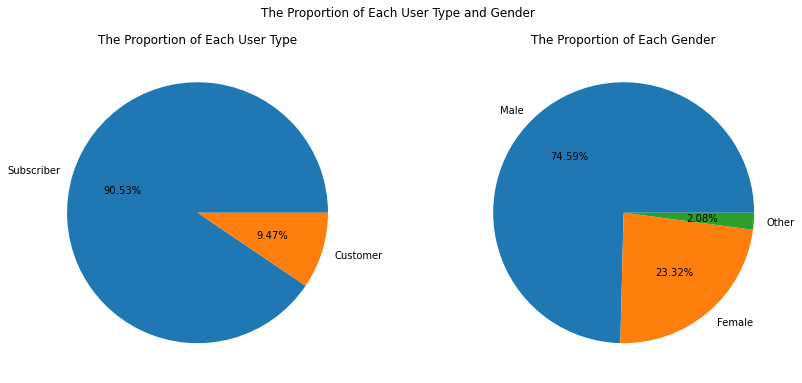

In [5]:
freq1 = tripdata['user_type'].value_counts()
freq2 = tripdata['member_gender'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle("The Proportion of Each User Type and Gender")
axs[0].pie(freq1, labels=freq1.index, autopct = '%1.2f%%')
axs[0].set_title('The Proportion of Each User Type')
axs[1].pie(freq2, labels=freq2.index, autopct = '%1.2f%%')
axs[1].set_title('The Proportion of Each Gender');

## The Effect of User Type on The Duration 

We plot the relation between user type and duration in a log scale, then we can see that customers take trips of long duration comparing to subscribers, which is totally normal due to the fact that customers are usually first time customers, then they will take a longer trip duration.

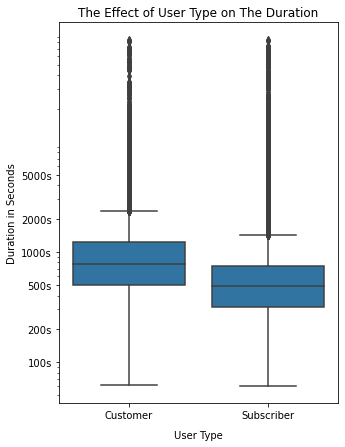

In [6]:
plt.figure(figsize=[5,7])
sb.boxplot(data=tripdata,x = 'user_type', y='duration_sec', color=sb.color_palette()[0])
plt.yscale('log')
plt.yticks([100,200,500,1e3,2e3,5e3],['100s','200s','500s','1000s','2000s','5000s'])
plt.xlabel('User Type', labelpad=10)
plt.ylabel('Duration in Seconds')
plt.title('The Effect of User Type on The Duration');

## The Effect of Gender on The Duration
We plot the relation between ugender and duration in a log scale, we could say that men have shorter trips comparing to other genders which was an unexpected outcome for me.

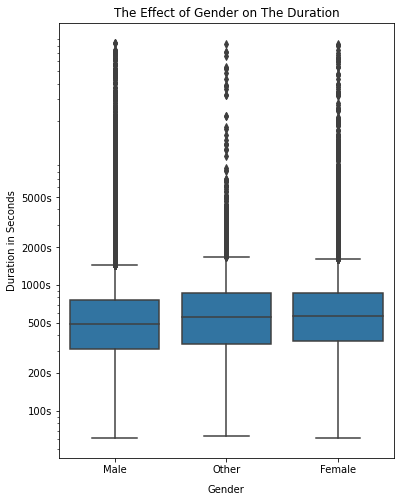

In [8]:
plt.figure(figsize=[6,8])
sb.boxplot(data=tripdata,x = 'member_gender', y='duration_sec', color=sb.color_palette()[0])
plt.yscale('log')
plt.yticks([100,200,500,1e3,2e3,5e3],['100s','200s','500s','1000s','2000s','5000s'])
plt.xlabel('Gender', labelpad=10)
plt.ylabel('Duration in Seconds')
plt.title('The Effect of Gender on The Duration');

## Duration by Gender and User Type
We plot our last case with two qualitative variables (gender and user type) and one quantitative variable: the duration. We conclude that customers' trips are longer in duration than subscribers' trips across all genders, which is a generalisation of the previous result in all genders.

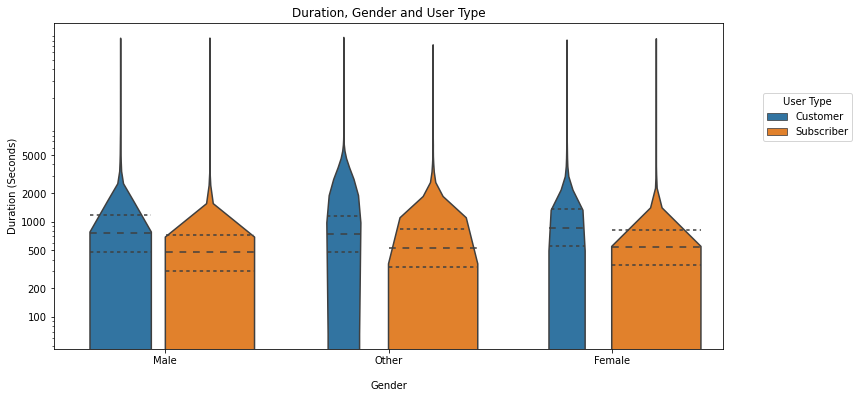

In [9]:
plt.figure(figsize=[12,6])
plt.yscale('log')
sb.violinplot(data=tripdata,x='member_gender',y='duration_sec',hue='user_type',inner='quartile')
plt.yticks([100,200,500,1e3,2e3,5e3],['100','200','500','1000','2000','5000'])
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Duration (Seconds)')
plt.title('Duration, Gender and User Type')
plt.legend(title='User Type', bbox_to_anchor=(1.2,0.8));

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Ford_GoBike_Project_Part2.ipynb --to slides --post serve --no-input --no-prompt

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
